<a href="https://colab.research.google.com/github/jessie0628/codingwithcx/blob/master/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This tutorial will teach you how to access real life data and understand it visually.

For this article, we employ one of the data sets available in Munchen.de, containing information about Oktoberfest since 1985 until 2018. Although most of the years are not available (Oktoberfest started in 1810!), the data set provides valuable insights about how the festival evolved over the last 30 years.

So, let's jump into it!

# Libraries to Use

To evaluate the dataset, we use three different Python libraries: Pandas, Matplotlib, and Plotly.

- [Pandas](https://pandas.pydata.org/index.html) is a Python open source library for data science that allows us to easily work with structured data, such as **csv files, SQL tables, or Excel spreadsheets**. It provides tools for reading and writing data in different formats, carrying out exploratory analysis, and cleaning data (reshaping data sets, handling missing data, or merging data sets).

- [Matplotlib](https://matplotlib.org/) is a Python 2D plotting library that can be used in Python scripts, Jupyter notebooks, and IPython shells, among other environments, producing high quality figures. Matplotlib offers a wide range of visualizations such as histograms, bar chart, scatter plots, box plots, or pie charts.

- [Plotly Python](https://plot.ly/python/) graphing library provides as Matplotlib a wide range of visualizations. But, unlike Matplotlib the visualizations provided by Plotly are interactive and more intuitive. 😉
After this overview about the libraries used in this analysis, we are ready to start the next step: exploratory data analysis and data cleaning.

After this overview of the libraries used in this analysis, we ready to load the dataset.

# Acquiring the data

You don't need to search the Muenchen.de website for the data. 

We provide a link to the data in the form of a csv file here :
https://drive.google.com/open?id=1pHNxZVrlcKh5usWoNC_V7gR2WdeDutjv

Click on the shareable link and the CSV file will be shared with your personal google drive.



Once you have the file in your drive, you need to upload it into Colaboratory.

First, run the following code:

In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

When prompted, click on the link to get authentication to allow Google to access your Drive. You should see a screen with “Google Cloud SDK wants to access your Google Account” at the top. After you allow permission, copy the given verification code and paste it in the box in Colab.

Once you have completed verification, go to the CSV file in Google Drive, right-click on it and select “Get shareable link”. The link will be copied into your clipboard. Paste this link into a string variable in Colab.


In [0]:
link = "" # The shareable link


What you want is the id portion after the equal sign. To get that portion, type in the following code:

In [0]:

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

Finally, type in the following code to get this file into a dataframe (Pandas)

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('oktoberfestgesamt19852018.csv')  

We load the CSV data into a Pandas data frame using the [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function and visualize the first 5 rows using the [pandas.DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load data into a pandas dataframe
df_oktoberfest = pd.read_csv('oktoberfestgesamt19852018.csv')

# Print first 5 rows of the dataframe
df_oktoberfest.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


The data set contains 8 columns: (1) year, (2) duration, (3) visitors in total, (4) visitors per day, (5) price of beer, (6) consumption of beer, (7) price of chicken, (8) consumption of chicken.

Let's try the [pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) function to view specific years. This function takes the index of each row as the argument, and outputs the corresponding row.

In [0]:
df_oktoberfest.iloc[[0]]

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
1,1986,16,6.7,419,3.3,53807,3.92,698137


You can get multiple rows like this.


In [0]:
df_oktoberfest.iloc[[0,1,2]]

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859


Now, let's try to do some data anlaysis. One of the biggest change in German economy was the conversion from Deutsche Mark to Euro. This was roughly around 1999 to 2000. Let's check the data from that years.

In [0]:
df_oktoberfest.iloc[[12,13,14,15,16,17],:]

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
12,1997,16,6.4,400,5.45,55891,5.38,699562
13,1998,16,6.5,406,5.60,54782,5.34,603746
14,1999,16,6.5,406,5.80,60054,5.38,609661
15,2000,18,6.9,383,6.35,64591,7.85,681242
16,2001,16,5.5,344,6.47,48698,8.12,351705
17,2002,16,5.9,369,6.75,57614,8.10,459259


From 1999 to 2000 there is a sudden increase in the beer and chicken price. This can be attributed to the conversion of Deutsche Mark to Euro as the official currency of Germany.

We set year as the index of the data frame. To easily access the information of different years.

In [0]:
# Set year as the index of the data frame
df_oktoberfest.set_index('jahr', inplace=True)


# Print first 5 rows of the dataframe
df_oktoberfest.head()

,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
jahr,,,,,,,
1985,16,7.1,444,3.20,54541,4.77,629520
1986,16,6.7,419,3.30,53807,3.92,698137
1987,16,6.5,406,3.37,51842,3.98,732859
1988,16,5.7,356,3.45,50951,4.19,720139
1989,16,6.2,388,3.60,51241,4.22,775674


# Analysing the Data

Exploratory data analysis allow us to get a feeling about the data set and to get the data set ready to easily draw conclusions using it.
Let's try to answer some common questions.

### How did beer price change over the last 33 years? Is there a tendency?

Text(0.5, 1.0, 'Evolution of prices from 1985 until 2018')

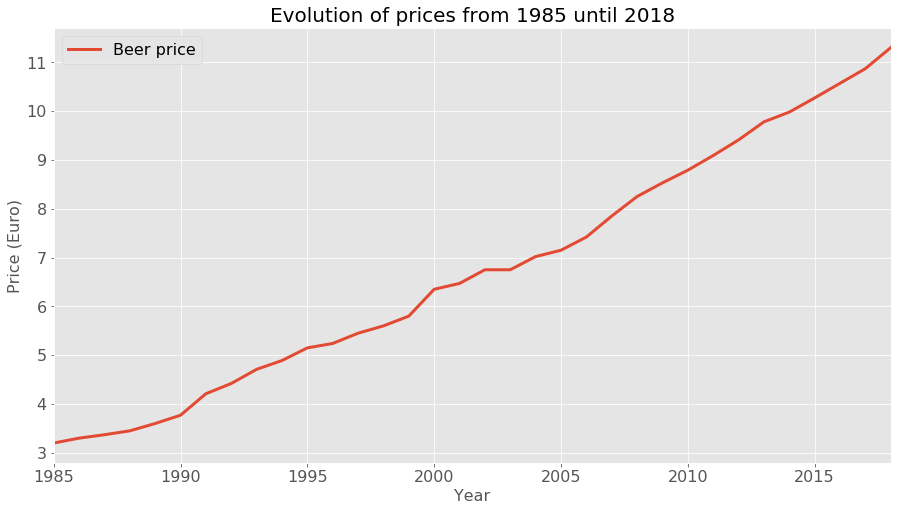

In [0]:
# Plot beer price
df_oktoberfest.plot(kind='line', y=['bier_preis'], figsize=(15,8), linewidth=3, fontsize=16)

# Title, labels and legend
plt.legend(labels=['Beer price'],fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price (Euro)',fontsize=16)
plt.title('Evolution of prices from 1985 until 2018',fontsize=20)

As we can see from the plot, the price of beer have increased steadily from 1985 until 2018,
Matter of fact, the price in 2018 is around three times more than in 1985.

Try to answer the following question yourself.

### How did chicken price change over the last 33 years? 

In [0]:
# Plot chicken price


# Title, labels and legend

In [0]:
# Price of a beer and a chicken in 1985
print(df_oktoberfest.loc[1985,['bier_preis','hendl_preis']].sum())


# Price of a beer and a chicken in 2018
print(df_oktoberfest.loc[2018,['bier_preis','hendl_preis']].sum())


7.97
22.97


So, you can see that a person in 1985 could enjoy a meal at the Oktoberfest for only 7.97 euros. Three decades later, we need almost three times more money (22.97 euros) to enjoy a meal at the festival.

Here we visualize a interactive plot of the prices

In [0]:
import plotly.graph_objects as go

# Interactive plots of the price of beer and chicken
year = df_oktoberfest.index
beer_price = df_oktoberfest.bier_preis
chicken_price = df_oktoberfest.hendl_preis

fig = go.Figure()

fig.add_trace(go.Scatter(x=year, y=chicken_price,
                    mode='lines+markers',
                    name='Chicken'))

fig.add_trace(go.Scatter(x=year, y=beer_price,
                    mode='lines+markers',
                    name='Beer'))

# Title, labels, and background
fig.update_layout(title='Evolution of prices from 1985 until 2018',
                   xaxis_title='Year',
                   yaxis_title='Price (Euro)',
                   plot_bgcolor='white')

### Beer Consumption

Let's take a look at the beer consumption over the years.



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fa780ce1b38> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Consumption of bier')

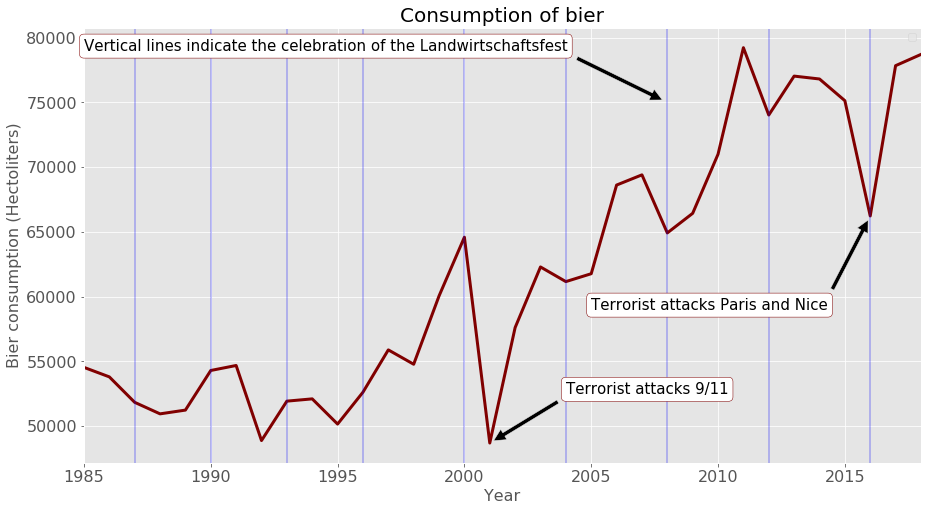

In [0]:
# Plot beer consumption 
df_oktoberfest.plot(y='bier_konsum', figsize=(15,8), linewidth=3, fontsize=16, color='maroon', label='_nolegend_')

# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest. 
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)


# Annotations - celebration of the landwirtschaftsfest and terrorist attacks  
plt.annotate('Vertical lines indicate the celebration of the Landwirtschaftsfest', xy=(2008, 75000), xytext=(1985, 79000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks 9/11', xy=(2001, df_oktoberfest.loc[2001,'bier_konsum']), xytext=(2004, 52500), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks Paris and Nice', xy=(2016, df_oktoberfest.loc[2016,'bier_konsum']), xytext=(2005, 59000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Bier consumption (Hectoliters)',fontsize=16)
plt.title('Consumption of bier',fontsize=20)

As we can observe, the consumption of beer presents a growing trend. The vertical lines indicate the years than the Oktoberfest coincided with the celebration of the Landswirtschaftsfest. This festival is celebrated every four years since 1996 (before every 3) at Theresienwiesen at the same time that Oktoberfest. We can see that small decreases in 2004, 2008, and 2012 could be related to the celebration of this festival.

On the contrary, the significant decreases of consumption of beer in 2001 and 2016 could be related to the September 11 terrorist attacks in 2001, the November 2015 Paris terrorist attacks, and the 2016 Nice truck attack. The number of visitors decreased in those years (2001 and 2016), showing the lowest values since 1985.


In [0]:
# Lowest number of visitors since 1985 in 2001,2016, and 1988. 
df_oktoberfest.besucher_gesamt.sort_values().head(3)

jahr
2001    5.5
2016    5.6
1988    5.7
Name: besucher_gesamt, dtype: float64

### Chicken Consumption

Now, you try the same for the chicken consumption and see for yourself if we have the same trend as the beer consumption.

You would need to do only minor changes to the code of beer consumption.

In [0]:
# Plot beer consumption 


# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest. 
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)


# Annotations - celebration of the landwirtschaftsfest and terrorist attacks  


# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Bier consumption (Hectoliters)',fontsize=16)
plt.title('Consumption of bier',fontsize=20)

### Number of Visitors

Finally let's take a look at the total number of visitors from 1985 to 2018.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fa77c8750f0> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Total number of visitors')

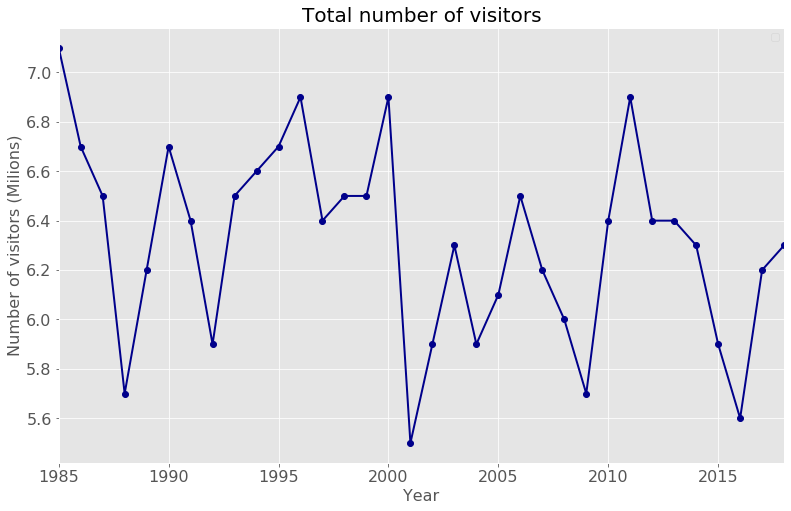

In [0]:
# Plot total number of visitors
df_oktoberfest.plot(y='besucher_gesamt', figsize=(13,8), marker='o', linewidth=2, fontsize=16, color='darkblue', label='_nolegend_')


# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of visitors (Milions)',fontsize=16)
plt.title('Total number of visitors',fontsize=20)

We can easily analyze the number of visitors by using the above plot. As we can observe, the number of visitors does not follow any trend, ranging from 5.5 to 7.1. So, the consumption of beer is not increasing because the festival has more visitors, but because the people drink more. 


# References
- https://towardsdatascience.com/oktoberfest-quick-analysis-using-pandas-matplotlib-and-plotly-79778367a4c
- https://www.muenchen.de/
- https://pandas.pydata.org/index.html
- https://matplotlib.org/
- https://plot.ly/python/